In [2]:
import sys
sys.path.append('../')
sys.path.append('../../')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

import tqdm
from torch.utils.data import DataLoader
from pytorchyolo.utils.datasets import ListDataset
from pytorchyolo.utils.transforms import DEFAULT_TRANSFORMS
import os

In [23]:
plt.rcParams.update({"text.usetex": False,
                     "font.size": 18,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})

In [5]:
cos = torch.nn.CosineSimilarity(dim=0, eps=1e-6)

In [6]:
def create_data_loader(data_path):
    dataset = ListDataset(data_path, img_size=416, multiscale=False, transform=DEFAULT_TRANSFORMS)
    dataloader = DataLoader(
        dataset,
        batch_size=1,
        shuffle=False,
        num_workers=4,
        pin_memory=True,
        collate_fn=dataset.collate_fn)
    return dataloader

In [7]:
def sort_func(e):
    return int(e.split(".")[0])

In [8]:
dataloader = create_data_loader("../../St_Marc_dataset/data/test_30_fps_cleaned.txt")

In [9]:
images = []
for _, imgs, targets in tqdm.tqdm(dataloader, desc="testing"):
    images.append(imgs)

testing: 100%|██████████| 200/200 [00:03<00:00, 57.45it/s] 


## Frame similarity

In [10]:
frame_similarity = []
for i in range(len(images)-1):
    frame_similarity.append( cos(images[i+1].reshape(images[i+1].numel()), images[i].reshape(images[i].numel())).item())

# L8 similarity

In [11]:
tensor_dir = "../measurements/layer_8/tensor/"
tensor_paths = os.listdir(tensor_dir)
tensor_paths.sort(key=sort_func)

In [12]:
l8_similarity = []

for i in range(len(tensor_paths)-1):
    tensor0 = torch.load(tensor_dir+tensor_paths[i])
    tensor1 = torch.load(tensor_dir+tensor_paths[i+1])
    l8_similarity.append(cos(tensor0.reshape(tensor0.numel()), tensor1.reshape(tensor1.numel())).item())

# L7 similarity

In [13]:
tensor_dir = "../measurements/layer_7/tensor/"
tensor_paths = os.listdir(tensor_dir)
tensor_paths.sort(key=sort_func)

In [14]:
l7_similarity = []

for i in range(len(tensor_paths)-1):
    tensor0 = torch.load(tensor_dir+tensor_paths[i])
    tensor1 = torch.load(tensor_dir+tensor_paths[i+1])
    l7_similarity.append(cos(tensor0.reshape(tensor0.numel()), tensor1.reshape(tensor1.numel())).item())

In [15]:
tensor_dir = "../measurements/layer_6/tensor/"
tensor_paths = os.listdir(tensor_dir)
tensor_paths.sort(key=sort_func)

l6_similarity = []

for i in range(len(tensor_paths)-1):
    tensor0 = torch.load(tensor_dir+tensor_paths[i])
    tensor1 = torch.load(tensor_dir+tensor_paths[i+1])
    l6_similarity.append(cos(tensor0.reshape(tensor0.numel()), tensor1.reshape(tensor1.numel())).item())

In [16]:
tensor_dir = "../measurements/layer_5/tensor/"
tensor_paths = os.listdir(tensor_dir)
tensor_paths.sort(key=sort_func)

l5_similarity = []

for i in range(len(tensor_paths)-1):
    tensor0 = torch.load(tensor_dir+tensor_paths[i])
    tensor1 = torch.load(tensor_dir+tensor_paths[i+1])
    l5_similarity.append(cos(tensor0.reshape(tensor0.numel()), tensor1.reshape(tensor1.numel())).item())

In [17]:
tensor_dir = "../measurements/layer_4/tensor/"
tensor_paths = os.listdir(tensor_dir)
tensor_paths.sort(key=sort_func)

l4_similarity = []

for i in range(len(tensor_paths)-1):
    tensor0 = torch.load(tensor_dir+tensor_paths[i])
    tensor1 = torch.load(tensor_dir+tensor_paths[i+1])
    l4_similarity.append(cos(tensor0.reshape(tensor0.numel()), tensor1.reshape(tensor1.numel())).item())

In [18]:
tensor_dir = "../measurements/layer_3/tensor/"
tensor_paths = os.listdir(tensor_dir)
tensor_paths.sort(key=sort_func)

l3_similarity = []

for i in range(len(tensor_paths)-1):
    tensor0 = torch.load(tensor_dir+tensor_paths[i])
    tensor1 = torch.load(tensor_dir+tensor_paths[i+1])
    l3_similarity.append(cos(tensor0.reshape(tensor0.numel()), tensor1.reshape(tensor1.numel())).item())

In [19]:
tensor_dir = "../measurements/layer_2/tensor/"
tensor_paths = os.listdir(tensor_dir)
tensor_paths.sort(key=sort_func)

l2_similarity = []

for i in range(len(tensor_paths)-1):
    tensor0 = torch.load(tensor_dir+tensor_paths[i])
    tensor1 = torch.load(tensor_dir+tensor_paths[i+1])
    l2_similarity.append(cos(tensor0.reshape(tensor0.numel()), tensor1.reshape(tensor1.numel())).item())

In [20]:
tensor_dir = "../measurements/layer_1/tensor/"
tensor_paths = os.listdir(tensor_dir)
tensor_paths.sort(key=sort_func)

l1_similarity = []

for i in range(len(tensor_paths)-1):
    tensor0 = torch.load(tensor_dir+tensor_paths[i])
    tensor1 = torch.load(tensor_dir+tensor_paths[i+1])
    l1_similarity.append(cos(tensor0.reshape(tensor0.numel()), tensor1.reshape(tensor1.numel())).item())

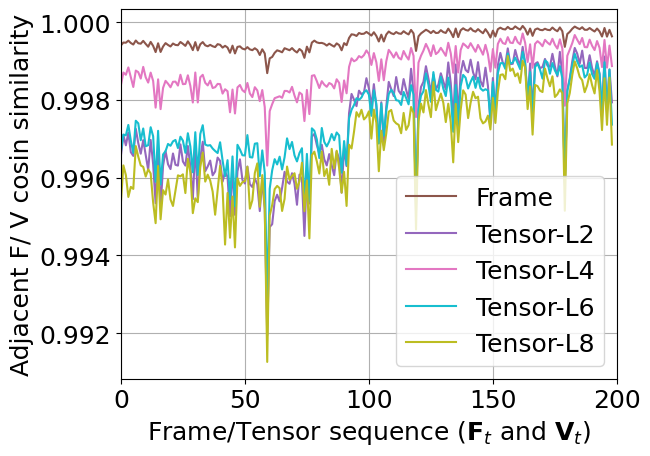

In [31]:
fig, ax1 = plt.subplots(figsize=(6.4,4.8))

ax1.plot(frame_similarity, label="Frame", color="tab:brown")

ax1.plot(l2_similarity, label="Tensor-L2", color="tab:purple")

ax1.plot(l4_similarity, label="Tensor-L4", color="tab:pink")

ax1.plot(l6_similarity, label="Tensor-L6", color="tab:cyan")

ax1.plot(l8_similarity, label="Tensor-L8", color="tab:olive")



ax1.set_xlabel(r"Frame/Tensor sequence ($\mathbf{F}_t$ and $\mathbf{V}_t$)")
ax1.set_ylabel("Adjacent F/ V cosin similarity")
ax1.set_xlim([0,200])
ax1.grid()
ax1.legend()
plt.savefig("../figures/similarity.pdf", bbox_inches='tight')

In [22]:
# plt.figure()

# plt.plot(frame_similarity, label="Frame", color="tab:brown")

# plt.plot(l2_similarity, label="Tensor-L2", color="tab:purple")

# plt.plot(l4_similarity, label="Tensor-L4", color="tab:pink")

# plt.plot(l6_similarity, label="Tensor-L6", color="tab:cyan")

# plt.plot(l8_similarity, label="Tensor-L8", color="tab:olive")



# plt.xlabel(r"Frame/Tensor sequence ($\mathbf{F}_t$ and $\mathbf{V}_t$)")
# plt.ylabel("Adjacent F/ V cosin similarity")
# plt.xlim([0,200])
# plt.grid()
# plt.legend()
# plt.savefig("../figures/similarity.pdf", bbox_inches='tight')